[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/slitvinov/cascade/blob/main/cascade.ipynb)

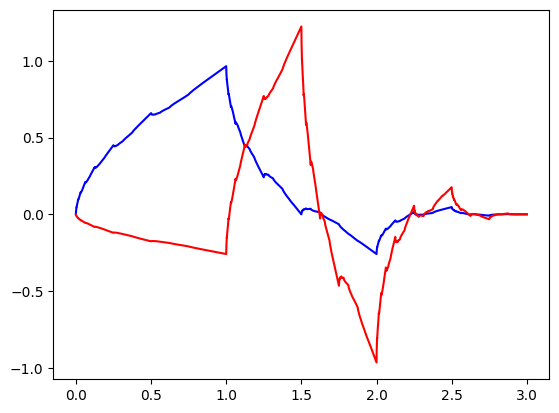

In [4]:
import matplotlib.pyplot as plt
import functools
import fractions
import numpy as np
import statistics


def cascade(h, level):

    @functools.cache
    def phi(x):
        return vec.get(x, 0) if x.denominator == 1 else statistics.fsum(
            c * phi(2 * x - k) for k, c in enumerate(h))

    def psi(x):
        return statistics.fsum(c * phi(2 * x - k) for k, c in enumerate(g))

    def qmf(h):
        return [(-1)**k * h[F - 1 - k] for k in range(F)]

    F = len(h)
    g = qmf(h)
    L = [[h[2 * i - j] if 0 <= 2 * i - j < F else 0 for j in range(1, F - 1)]
         for i in range(1, F - 1)]
    val, vec = np.linalg.eig(L)
    vec = dict((i + 1, x) for i, x in enumerate(vec[:, 0]))
    ts = sorted({
        fractions.Fraction(k, 1 << i)
        for i in range(level)
        for k in range((F - 1) * (1 << i))
    })
    return ts, [phi(t) for t in ts], [psi(t) for t in ts]


h = (1 + 3**0.5) / 4, (3 + 3**0.5) / 4, (3 - 3**0.5) / 4, (1 - 3**0.5) / 4
ts, phi, psi = cascade(h, 13)
plt.plot(ts, phi, 'b', ts, psi, 'r');

'''
compare to "dp 4"
https://en.wikipedia.org/wiki/Daubechies_wavelet
https://en.wikipedia.org/wiki/Daubechies_wavelet#/media/File:Daubechies4-functions.svg
'''